In [1]:
import random
from scipy.stats import norm, binom, expon, wilcoxon, kstest, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv('test3.csv') # данный файл
x = df[df['group'] == 'test']['click_flg']
y = df[df['group'] == 'control']['click_flg']

Тестируем конверсию в переход на сайт, значит нам нужно воспользоваться z-тестом для двух долей

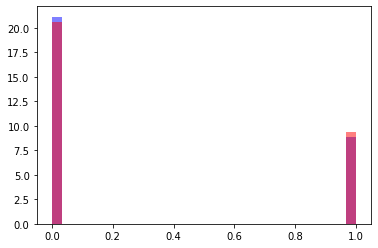

In [3]:
plt.hist(x, bins=30, density=True, color='blue', alpha=0.5)
plt.hist(y, bins=30, density=True, color='red', alpha=0.5)
plt.show()

Пользуемся функцией proportions_ztest, считаем статистику и соответствующий p-value  


In [4]:
stat, pvalue = proportions_ztest([sum(x), sum(y)],  [len(x), len(y)]) 
print("test statistic: ", stat)
print("p-value: ", pvalue)

test statistic:  -2.595183244634136
p-value:  0.009454050012441642


Как мы видим изменения статзначимо повлияли на конверсию  
Тогда посчитаем выборочную конверсию на тесте и на контроле

In [5]:
print("Test: ", sum(x) / len(x))
print("Control: ", sum(y) / len(y))

Test:  0.2955203033024045
Control:  0.31238761238761237


На тесте конверсия уменьшилась, причем статзначимо  